<a href="https://colab.research.google.com/github/sksaket/DataScience_R-code/blob/main/AIRLINES_H_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans
df=pd.read_csv("/content/airlines.csv")


In [19]:
def norm_func(i):
    x=(i-i.min()/i.std())
    return (x)
df_norm=norm_func(df.iloc[:,1:])
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 
help(linkage)
z=linkage(df_norm,method="complete",metric="euclidean")

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d condensed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the n

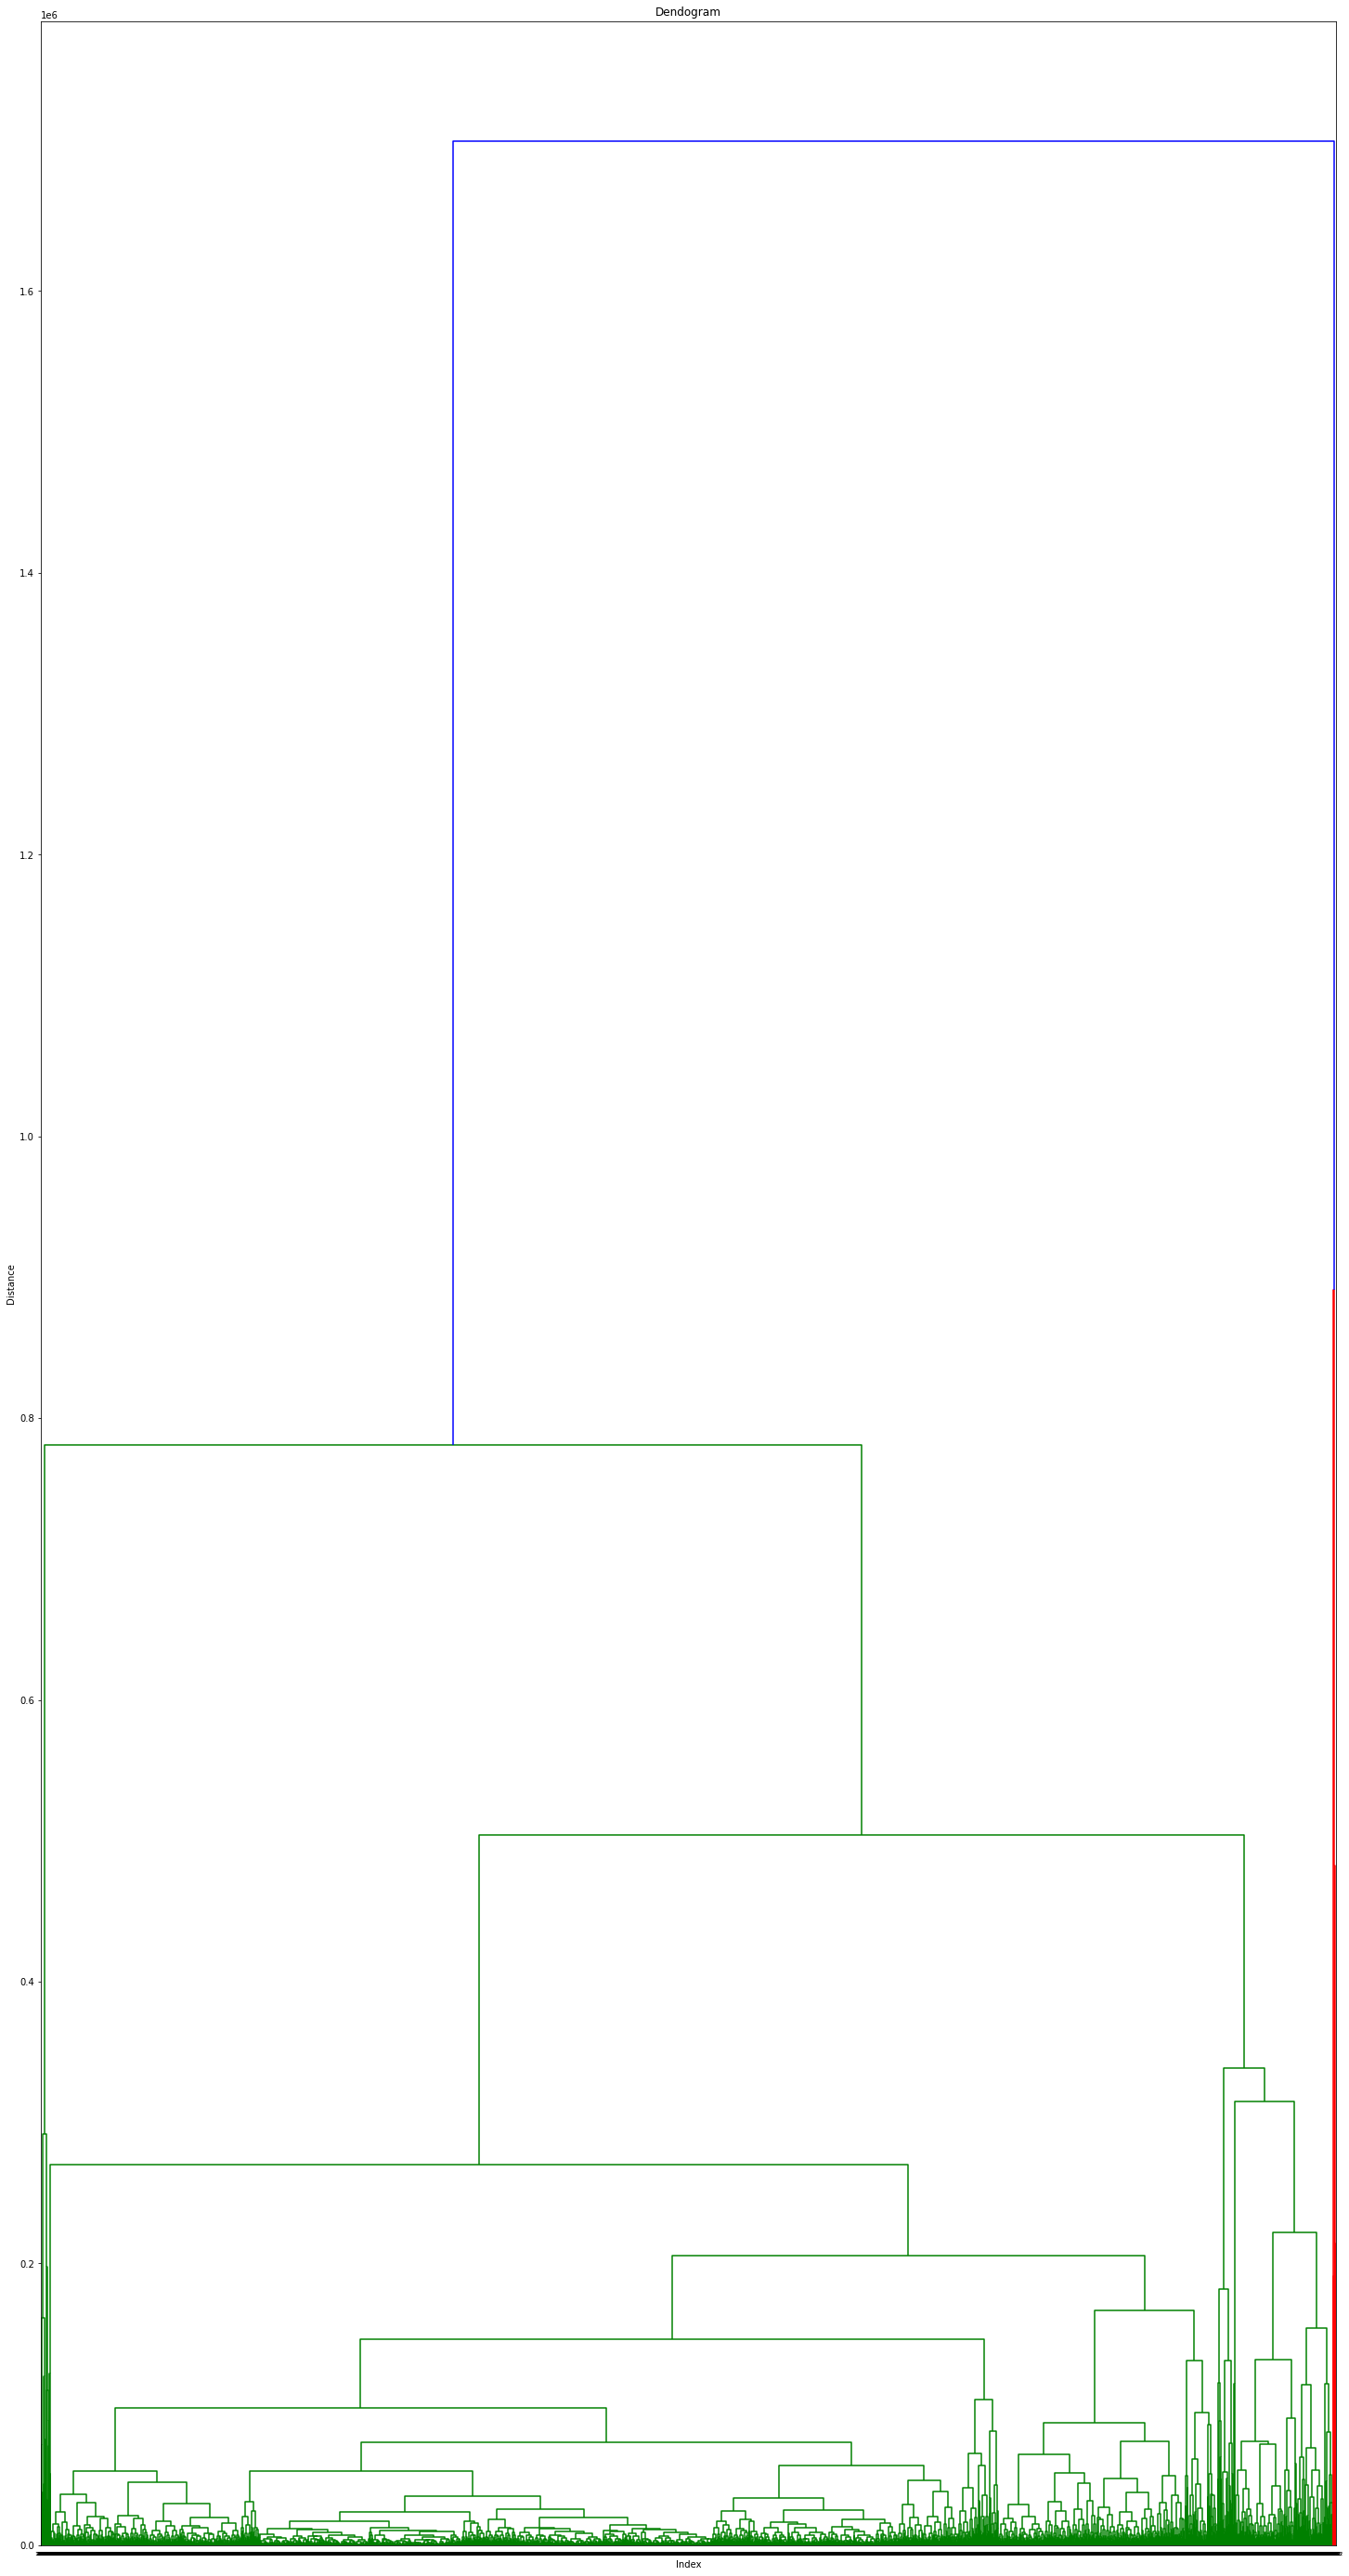

In [20]:
plt.figure(figsize=(25,50));plt.title("Dendogram");plt.xlabel("Index");plt.ylabel("Distance")
sch.dendrogram(
    z,
    leaf_rotation=0.,
    leaf_font_size=6.,
)
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering
h_labels=AgglomerativeClustering(n_clusters=14,affinity="euclidean",linkage="complete").fit(df_norm)
clusters_labels=pd.Series(h_labels.labels_)

In [22]:
df["Clusters"]=clusters_labels
df_final=df.iloc[:,[0,12,1,2,3,4,5,6,7,8,9,10,11]]
df_final.to_csv("Flights.csv")